# Data cleaning and operationalization

I'm going to introduce a dataset of vehicle crashes in Indiana, show how to import it into pandas, and give examples of a few ways of exploring this data.

**Download the data from [here](https://github.com/jdfoote/Intro-to-Programming-and-Data-Science/blob/master/resources/data/aries_crash_data_2018_filtered.csv?raw=true)**. I created this CSV file from [this full dataset](https://hub.mph.in.gov/dataset/aries-crash-data-2007-2017/resource/cc90589c-72d8-4d92-a5fe-73254b555c73) by filtering out many of the columns to make it small enough to easily fit in memory.

A description of the columns is [here](https://hub.mph.in.gov/dataset/aries-crash-data-2007-2017/resource/f61a5dcb-5ca3-485a-9ecf-cd3d8740dc9b?inner_span=True).

Then, I want you to form groups of 2-4 where you identify a hypothesis about this data, brainstorm a visualization or set of visualizations that would give you insight into your hypothesis, and then try to create that visualization in Python.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
# This code downloads the CSV every time it's run.
# Instead, you may want to download the CSV to your computer, and load it from there
# You can use the same code, just change the path to where you download it
raw_df = pd.read_csv('https://github.com/jdfoote/Intro-to-Programming-and-Data-Science/blob/master/resources/data/aries_crash_data_2018_filtered.csv?raw=true')

In [72]:
raw_df = raw_df.loc[raw_df.PERSONTYPEDESCR != 'Owner Vehicle']

In [4]:
grouped = raw_df.sort_values(['COLLDTE', 'COLLISION_TIME']).groupby("INDIVIDUAL_MR_RECORD")

# For example, this is a simple test of the number of unique weather descriptions per group.
sum(grouped.WEATHERDESCR.nunique() > 1)

0

In [5]:
# Get the first entry for each of these
coll_df = pd.DataFrame({"date" : grouped.COLLDTE.first(),
                        "time": grouped.COLLISION_TIME.first() + grouped.COLLISION_TIME_AM_PM.first(), 
                        "injured": grouped.INJUREDNMB.first(),
                        "deceased": grouped.DEADNMB.first(),
                        "weather": grouped.WEATHERDESCR.first(),
                        "accident_count": 1
                       })

coll_df

,date,time,injured,deceased,weather,accident_count
INDIVIDUAL_MR_RECORD,,,,,,
903070479,2018-01-01,12:03AM,3.0,0.0,Cloudy,1
903070487,2018-01-01,12:48AM,0.0,0.0,Snow,1
903070491,2018-01-01,12:57AM,0.0,0.0,Clear,1
903070495,2018-01-01,12:45AM,0.0,0.0,Snow,1
903070497,2018-01-01,12:26AM,0.0,0.0,Snow,1
...,...,...,...,...,...,...
903377525,2018-12-26,03:02PM,0.0,0.0,Clear,1
903377671,2018-12-27,09:45PM,0.0,0.0,Cloudy,1
903384692,2018-12-31,05:57PM,0.0,0.0,Snow,1


In [6]:
coll_df.index = pd.to_datetime(coll_df.date + ' ' + coll_df.time)

In [7]:
def get_mode(x):
    return x.mode()

In [8]:
accidents_per_day = coll_df.groupby(coll_df.index.date).agg(
    # Create a new column called weather which gets the modal weather for each day
    weather = ('weather', get_mode),
    # And accidents which is the number of accidents that day
    accidents = ('accident_count', sum))

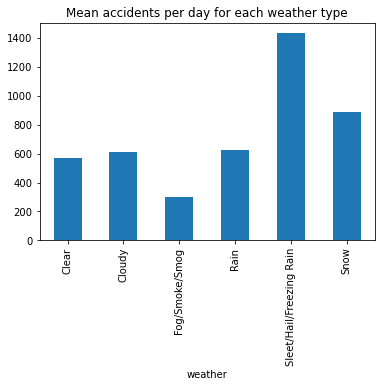

In [9]:
accidents_per_day.groupby('weather').accidents.mean().plot.bar();
plt.title('Mean accidents per day for each weather type');

## Exercises

1. How would you create the above plot in Seaborn instead?

NameError: name 'xticks' is not defined

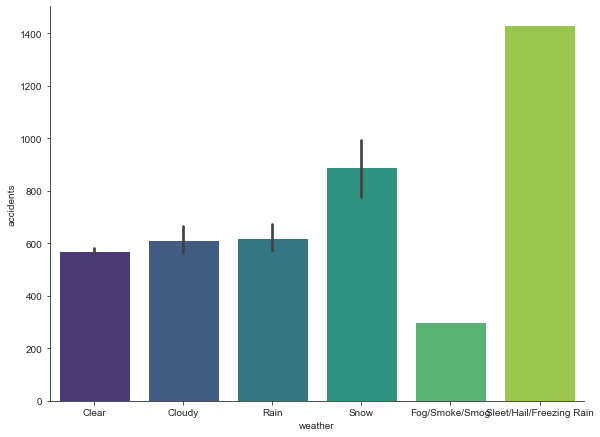

In [11]:
sns.set_style("ticks")
accidents_per_day.head()

sns.catplot(data=accidents_per_day, kind="bar",
    x="weather", y="accidents", #hue="sex",
    palette="viridis", height=6, aspect=11/8);
xticks(rotation=45);

2. Find a question that you'd like to answer with this data or the reddit data. Figure out how to filter/clean/group the data to produce the summary data that will help you to find that answer, and produce a visualization.

In [81]:
df = raw_df.loc[raw_df.PERSONTYPEDESCR == 'Driver']

In [83]:
df = df.loc[df.COLLISION_TIME_AM_PM == 'PM']

In [84]:
df.loc['test'] = 3

/home/jeremy/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [74]:
df['datetime'] = pd.to_datetime(df.COLLDTE + ' ' + df.COLLISION_TIME + ' ' + df.COLLISION_TIME_AM_PM)

<ipython-input-74-9f5b7e72d976>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['datetime'] = pd.to_datetime(df.COLLDTE + ' ' + df.COLLISION_TIME + ' ' + df.COLLISION_TIME_AM_PM)


In [28]:
df.index = df.datetime

In [30]:
df['hour'] = df.index.hour

<ipython-input-30-c1ad8e118a40>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = df.index.hour


In [40]:
df.groupby('hour').size()

hour
0.0      4234
1.0      3056
2.0      2540
3.0      2880
4.0      3583
5.0      5849
6.0     10691
7.0     19871
8.0     16619
9.0     13251
10.0    14203
11.0    17793
12.0    20810
13.0    20606
14.0    23706
15.0    29965
16.0    30254
17.0    30542
18.0    21136
19.0    14103
20.0    10627
21.0     9133
22.0     7314
23.0     5398
dtype: int64

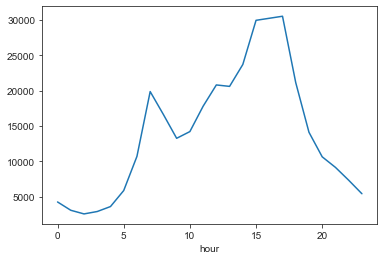

In [38]:
df.groupby('hour').size().plot();

In [104]:
df['gender'] = df.GENDERCDE

In [52]:
df.groupby('PRIMARYFACTORDESCR').size().sort_values()

PRIMARYFACTORDESCR
SHOULDER DEFECTIVE                              3
LANE MARKING OBSCURED                          15
SEVERE CROSSWINDS                              29
OTHER LIGHTS DEFECTIVE                         39
OTHER TELEMATICS IN USE                        55
TOW HITCH FAILURE                             111
TRAFFIC CONTROL INOPERATIVE/MISSING/OBSC      115
HOLES/RUTS IN SURFACE                         140
HEADLIGHT DEFECTIVE OR NOT ON                 147
ACCELERATOR FAILURE OR DEFECTIVE              173
OBSTRUCTION NOT MARKED                        194
ENGINE FAILURE OR DEFECTIVE                   214
OVERSIZE/OVERWEIGHT LOAD                      238
STEERING FAILURE                              309
WRONG WAY ON ONE WAY                          420
CELL PHONE USAGE                              682
PEDESTRIAN ACTION                             722
INSECURE/LEAKY LOAD                           744
DRIVER ILLNESS                                909
TIRE FAILURE OR DEFECTIVE      

In [53]:
grouped = df.groupby('INDIVIDUAL_MR_RECORD')

In [92]:
def is_factor_equal(group):
    is_equal = len(group.PRIMARYFACTORDESCR.unique()) == 1
    return is_equal

In [95]:
x = grouped.apply(is_factor_equal)

In [96]:
sum(x == False)

0

In [100]:
def rename_factor(row):
    if row.PRIMARYFACTORDESCR == 'FOLLOWING TOO CLOSELY':
        new_name = 'Too close'
    else:
        new_name = 'Other type'
    return new_name

In [101]:
df['simple_category'] = df.apply(rename_factor, axis=1)

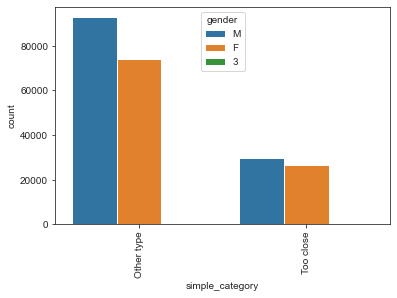

In [105]:
sns.countplot(hue='gender', x="simple_category",  data = df)
plt.xticks(rotation=90);